### Machine Learning Assignment 2
#### Alexandra Tew 10/3/23

1. Let −→q = [qx, qy] be an arbitrary vector. Compute:

1) the coordinate of −→q in the space of [S, T]:

Use the dot product with the basis vectors →e_s and →e_t to find the coordinates in the new space:

→q · →e_s = qx * Sx + qy * Sy

→q · →e_t = qx * Tx + qy * Ty

2) the coordinate of −→q in the space of [U, V ]: 

The dot product can be used to find the coordinates in the new space with the basis vectors →e_u and →e_v:

→q · →e_u = qx * Ux + qy * Uy

→q · →e_v = qx * Vx + qy * Vy

3) Can you explain why orthogonal basis makes things easier to handle?

Applying transformations withing an Orthogonal basis makes things easier to handle because the dot product of the basis vectors becomes zero, the basis vectors are linearly independent, and lengths and angles are preserves all of which make vector calculations computationally simpler. 

In [64]:
# PCA Class

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.cov_matrix = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.variance = None
        self.scores = None
        self.loadings = None

    # fit data to PC model 
    def fit(self, data):
        # Step 1: Mean-centering
        self.mean = np.mean(data, axis=0)
        centered_data = data - self.mean

        # Step 2: Calculate the covariance matrix
        self.cov_matrix = np.cov(centered_data, rowvar=False)

        # Step 3: Eigen-decomposition with np.linalg.eig()
        self.eigenvalues, self.eigenvectors = np.linalg.eig(self.cov_matrix)

        # Step 4: Project data onto the PC1/PC2 axis
        if self.n_components is not None:
            # Sort lambda and eigenvectors in descending order
            sorted_indices = np.argsort(self.eigenvalues)[::-1]
            self.eigenvalues = self.eigenvalues[sorted_indices][:self.n_components]
            self.eigenvectors = self.eigenvectors[:, sorted_indices][:, :self.n_components]

        # Use dot product to find scores
        self.scores = np.dot(centered_data, self.eigenvectors)

        # Calculate total variance and percent variance that is explained by 1st 2 PC's
        total_variance = np.sum(self.eigenvalues)
        self.variance = self.eigenvalues[:2] / total_variance * 100

        # Calculate loadings
        self.loadings = self.eigenvectors * np.sqrt(self.eigenvalues)


    def scores_plot(self, raw_data=None):
        
        plt.figure(figsize=(8, 6))
        plt.title('Scores Plot')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.scatter(self.scores[:, 0], self.scores[:, 1], c='b', marker='o', edgecolors='k', label='PCA Scores')
        plt.grid(True)
        plt.show()

    def scree_plot(self):

        plt.figure(figsize=(8, 6))
        plt.scatter(range(1, len(self.variance) + 1), self.variance, c='b', marker='o')
        plt.xlabel('Principal Component')
        plt.ylabel('Variance (%)')
        plt.title('Scree Plot')
        plt.grid(True)
        plt.show()

    def data_projection_PC1(self, data):
        # Project raw data onto PC1
        scores_pc1 = np.dot(data, self.eigenvectors[:, 0])

        # Create a scatter plot for the projected data on PC1
        plt.figure(figsize=(8, 6))
        plt.scatter(scores_pc1, np.zeros_like(scores_pc1), c='b', marker='o', edgecolors='k')
        plt.title('Data Projected onto PC1')
        plt.xlabel('Principal Component 1')
        plt.grid(True)
        plt.show()

    def loadings_plot(self):
        # Create Loadings Plot
        plt.figure(figsize=(8, 6))
        pc1_loadings = self.loadings[:, 0]
        pc2_loadings = self.loadings[:, 1]

        # Create a scatter plot to visualize variable contributions to PC1 and PC2
        plt.scatter(pc1_loadings, pc2_loadings, marker='o', edgecolors='k')

        # Label points with variable names (assuming data.columns contains variable names)
        if hasattr(self, 'data'):
            for i, variable in enumerate(self.data.columns):
                plt.annotate(variable, (pc1_loadings[i], pc2_loadings[i]))
        
        plt.xlabel('PC1 Loadings')
        plt.ylabel('PC2 Loadings')
        plt.title('Loadings Plot (PC1 vs. PC2)')
        plt.grid(True)
        plt.show()

In [65]:
if __name__ == "__main__":
   # Load in CSV file
    csv_file1 = 'Homework_2_dataset_prob3.csv'
    data1 = pd.read_csv(csv_file1)
    # print(data1)
    
    csv_file2 = 'Homework_2_dataset_prob4.csv'
    data2 = pd.read_csv(csv_file2, index_col=0)

    # Transpose the data2 for prob4
    data2 = data2.values.T

    # Create instances of the PCA class and set n_components based on data shape
    pca = PCA(n_components=min(data1.shape[0], data1.shape[1]))
    pca2 = PCA(n_components=min(data2.shape[0], data2.shape[1]))

    # Fit the data using the PCA instance
    pca.fit(data1)
    pca2.fit(data2)

In [66]:
    # Print results
    print(f"Variance of PC1 + PC2: {np.sum(pca.variance)}\nPC Scores: \n{pca.scores}\nLoadings: \n{pca.loadings}")

Variance of PC1 + PC2: 100.0
PC Scores: 
[[ 22.98125567  -1.37554593]
 [ 22.49894927  -2.28970193]
 [ 20.005713    -1.36361068]
 [ 19.25038654  -2.02791987]
 [ 17.43671516  -1.72371377]
 [ 15.7347048   -1.52169118]
 [ 13.81334629  -1.11893815]
 [ 12.92246342  -1.65919662]
 [ 11.67612091  -1.87416596]
 [  9.20147893  -0.96509075]
 [  8.66382649  -1.82859835]
 [  6.12162538  -0.85769827]
 [  5.65215179  -1.78359786]
 [  6.22197684  -3.66058307]
 [  1.47693189  -0.67381093]
 [  1.65972922  -2.19661835]
 [  1.39460442  -3.30952212]
 [ -0.97476546  -2.4967838 ]
 [ -3.36938661  -1.66093746]
 [ -4.08672549  -2.36000994]
 [ -7.05572945  -0.99853296]
 [ -6.55487496  -2.81240164]
 [ -7.89657768  -2.9401047 ]
 [ -9.95393323  -2.41289772]
 [-12.20501147  -1.70841075]
 [-13.03194198  -2.30719345]
 [-12.68705447  -3.97833325]
 [-14.87113662  -3.33515589]
 [-17.11119877  -2.64074999]
 [-18.37071021  -2.84366813]
 [ 18.18280056   3.0156285 ]
 [ 18.7298962    1.15944348]
 [ 16.45861679   1.88241701]
 [

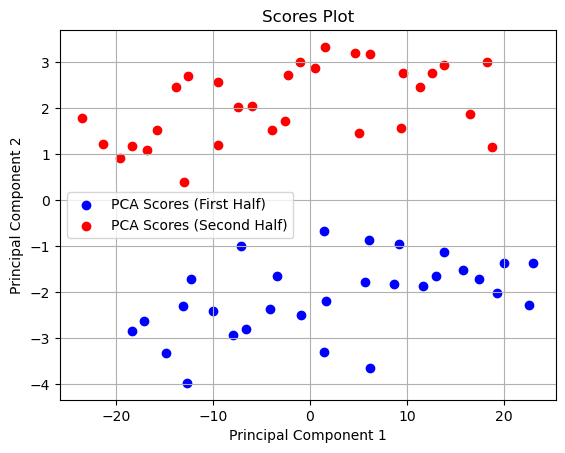

In [67]:
# Question 3, part 1
# Plot scores plot, I elected to do this outside of the class scores_plot function to display the scores in 
# different colors to help answer part 2 of question 2. 

# Plot PCA-transformed scores for the first half of the data
plt.scatter(pca.scores[:30, 0], pca.scores[:30, 1], c='b', marker='o', label='PCA Scores (First Half)')

# Plot PCA-transformed scores for the second half of the data
plt.scatter(pca.scores[30:, 0], pca.scores[30:, 1], c='r', marker='o', label='PCA Scores (Second Half)')

plt.title('Scores Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Question 3, part 2
Yes, when looking at the scores plot there is a clear separation of raw data into two groups

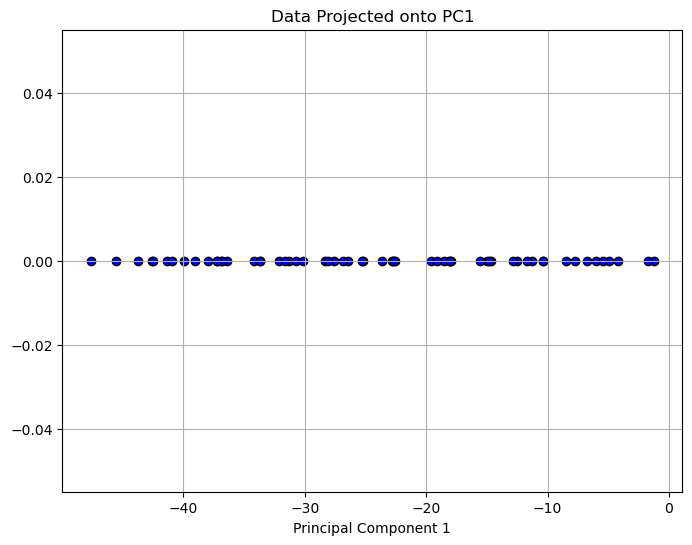

In [68]:
pca.data_projection_PC1(data1)

#### Question 3, part 3
The data projection onto PC1 plot above indicates that the data points are highly aligned along the direction of the first principal component suggesting that PC1 captures the dominant pattern or direction of variation in the data. We can assume in looking at this plot that the first PC represents the primary source of variation in the prob3 data, and that it explains the majority of the variance within the data. 

In [69]:
# Question 3, part 4
variance_pc1 = np.var(pca.scores[:, 0])
variance_pc2 = np.var(pca.scores[:, 1])
print("Variance of projections on PC1:", variance_pc1)
print("Variance of projections on PC2:", variance_pc2)
print("Eigenvalues of covariance matrix for data1:", pca.eigenvalues)

Variance of projections on PC1: 158.3567117683786
Variance of projections on PC2: 5.039862489564206
Eigenvalues of covariance matrix for data1: [161.04072383   5.12528389]


#### Question 3, part 5
The relationship between the variances and eigenvalues demonstrates that the variance of projections on each principal component corresponds to the magnitude of the associated eigenvalue. 

The variance of both projections onto PC1 and PC2 is approximately equal to the magnitude of each of the corresponding eigenvalues. This makes sense given that the eigenvalues represent the amount of variance explained by each principal component. As we can see by the value of the variance and eigenvalue for PC1, the first principle component captures a significant amount of variance in the data and PC2 demonstrates a much smaller amount of variance.

In [70]:
# Question 4
# Print results
print(f"Variance of PC1 + PC2: {np.real(np.sum(pca2.variance))}\nLoadings: \n{np.real(pca2.loadings)}")

# To see the scores printed just uncomment the command below, they were quite lengthy so I wanted to spare you the scrolling
# print(f"Scores:\n{np.real(pca2.scores)}")

Variance of PC1 + PC2: 82.34270949037864
Loadings: 
[[ 2.26508587e+03 -5.13123646e+02 -2.61749288e+03 ... -2.53176873e+02
  -1.24469109e+03 -1.53445955e-04]
 [ 3.02151140e+04 -2.60470774e+04 -2.40875442e+04 ...  2.86567430e+04
   1.89733263e+04 -1.57279596e-03]
 [-2.64924052e+04  1.91464442e+04  2.04745060e+04 ... -2.58968788e+04
  -1.68220596e+04 -9.87452977e-05]
 ...
 [-4.51142111e+02  5.58411928e+01  4.70139502e+01 ... -4.28189863e+02
   1.84973293e+01 -2.43067298e-05]
 [-1.27613470e+03  5.12245029e+02 -2.42935150e+02 ... -3.42743076e+02
  -5.88714147e+02 -4.43507969e-05]
 [-8.73741703e+03  3.14154238e+04 -2.61448287e+04 ...  6.18519044e+04
  -1.16953289e+04 -2.43422417e-03]]


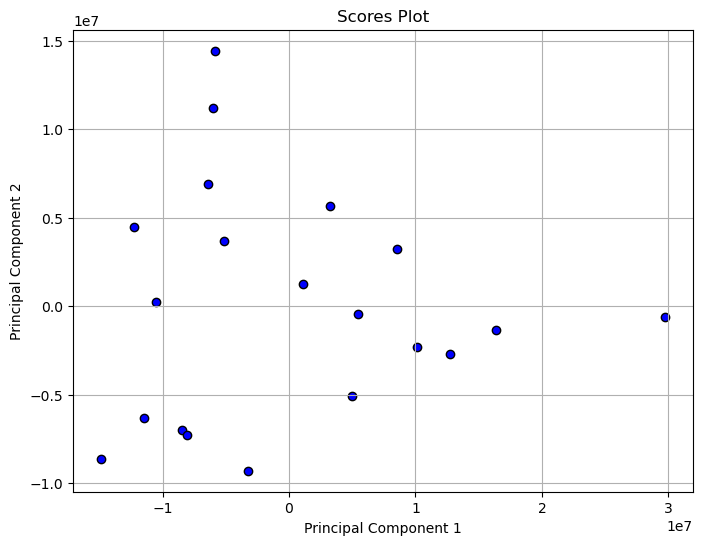

array(None, dtype=object)

In [72]:
np.real(pca2.scores_plot())

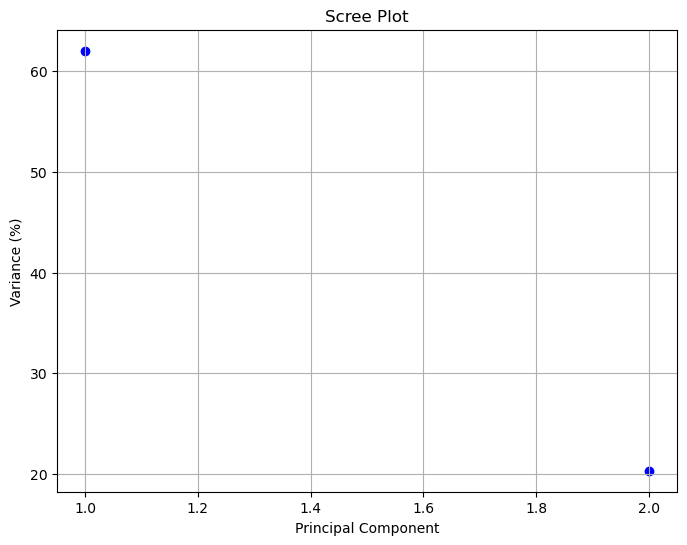

array(None, dtype=object)

In [73]:
# Plot the first 2 principle components in a scree plot
np.real(pca2.scree_plot())

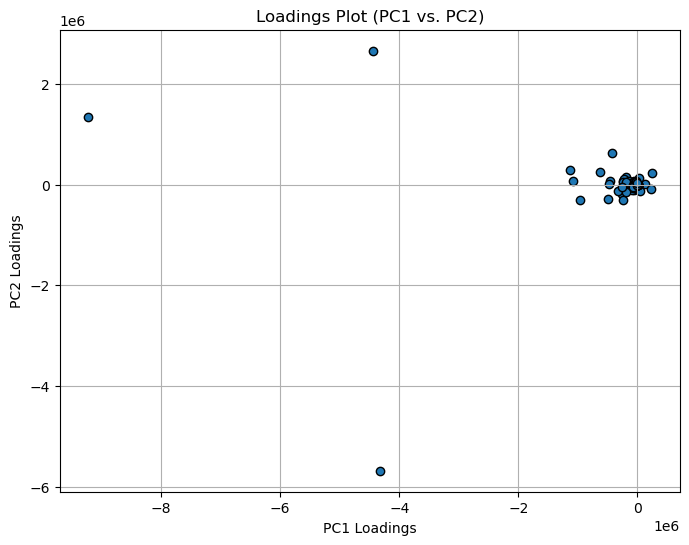

array(None, dtype=object)

In [74]:
np.real(pca2.loadings_plot())